# Lab 2 - Clustering
Course Machine Learning II

Name: Federico Ocampo Ortiz

## 4. Remember the unsupervised Python package
you created in the previous unit? 😀It’s time for an upgrade.

a. Implement the k-means module using Python and Numpy

b. Implement the k-medoids module using Python and Numpy

c. Remember to keep consistency with Scikit-Learn API as high as possible

In [10]:
# import libraries
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('.','mlpackage'))
if module_path not in sys.path:
    sys.path.append(module_path)

## 5. Let’s use the newly created modules in unsupervised
to cluster some toy data

a) generate scatter data

b) Plot the resulting dataset. How many clusters are there? How far are they from one another?

c) For both k-means and k-medoids (your implementations), calculate the silhouette plots and coefficients for each run, iterating K from 1 to 5 clusters.

d) What number of K got the best silhouette score? What can you say about the figures? Is this the
expected result?


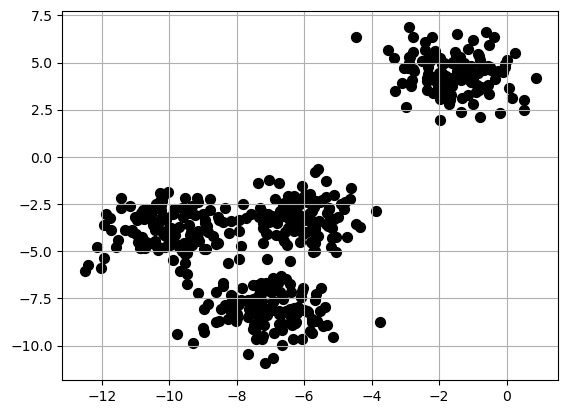

In [11]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
    )

# plot X, y using matplotlib

plt.scatter(X[:, 0], X[:, 1], c='black', marker='o', s=50)
plt.grid()
plt.show()


There are four groups, but three of them are very close, so maybe it will be hard for the algorithm to cluster correctly these three groups.

In [12]:
def plot_clusters(X, y, centroids, title=None):
    # plot the clusters and centroids
    for i in range(int(np.max(y)) + 1):
        plt.scatter(
            X[y == i, 0],
            X[y == i, 1],
            s=50,
            marker='o',
            label=f'cluster {i+1}'
        )
    # plot the centroids
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        s=250,
        marker='*',
        c='red',
        label='centroids'
        )

    plt.legend()
    plt.grid()
    if title:
        plt.title(title)
    plt.show()

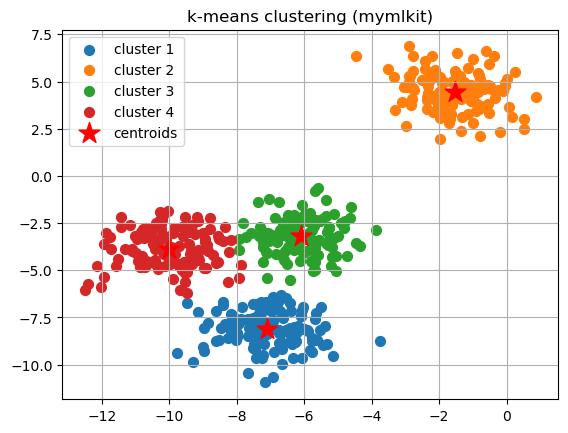

In [13]:
# call kmeans of local library mymlkit on X
from mymlkit.kmeans import KMeans

kmeans = KMeans(K=4, max_iters=150, init="random")

# fit and predict
kmeans.fit(X)
y_kmeans = kmeans.predict()

# plot the 4 clusters
# convert kmeans.centroids to numpy array
plot_clusters(X, y_kmeans, np.array(kmeans.centroids), 'k-means clustering (mymlkit)')

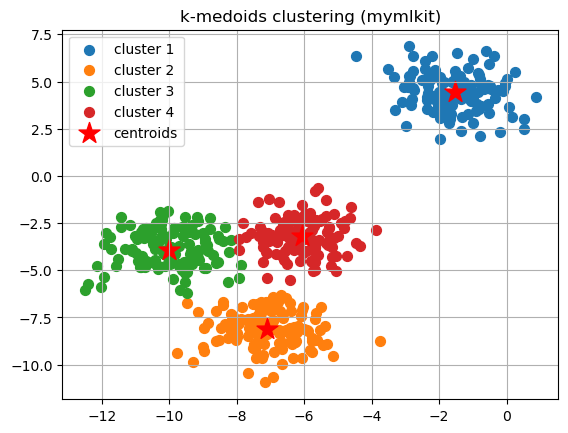

In [14]:
# call kmedoids of local library mymlkit on X
from mymlkit.kmedoids import KMedoids

kmedoids = KMedoids(K=4, max_iters=150, init="random")

# fit and predict
kmedoids.fit(X)
y_kmedoids = kmedoids.predict()

# plot the 4 clusters
plot_clusters(X, y_kmedoids, np.array(kmedoids.centroids), 'k-medoids clustering (mymlkit)')

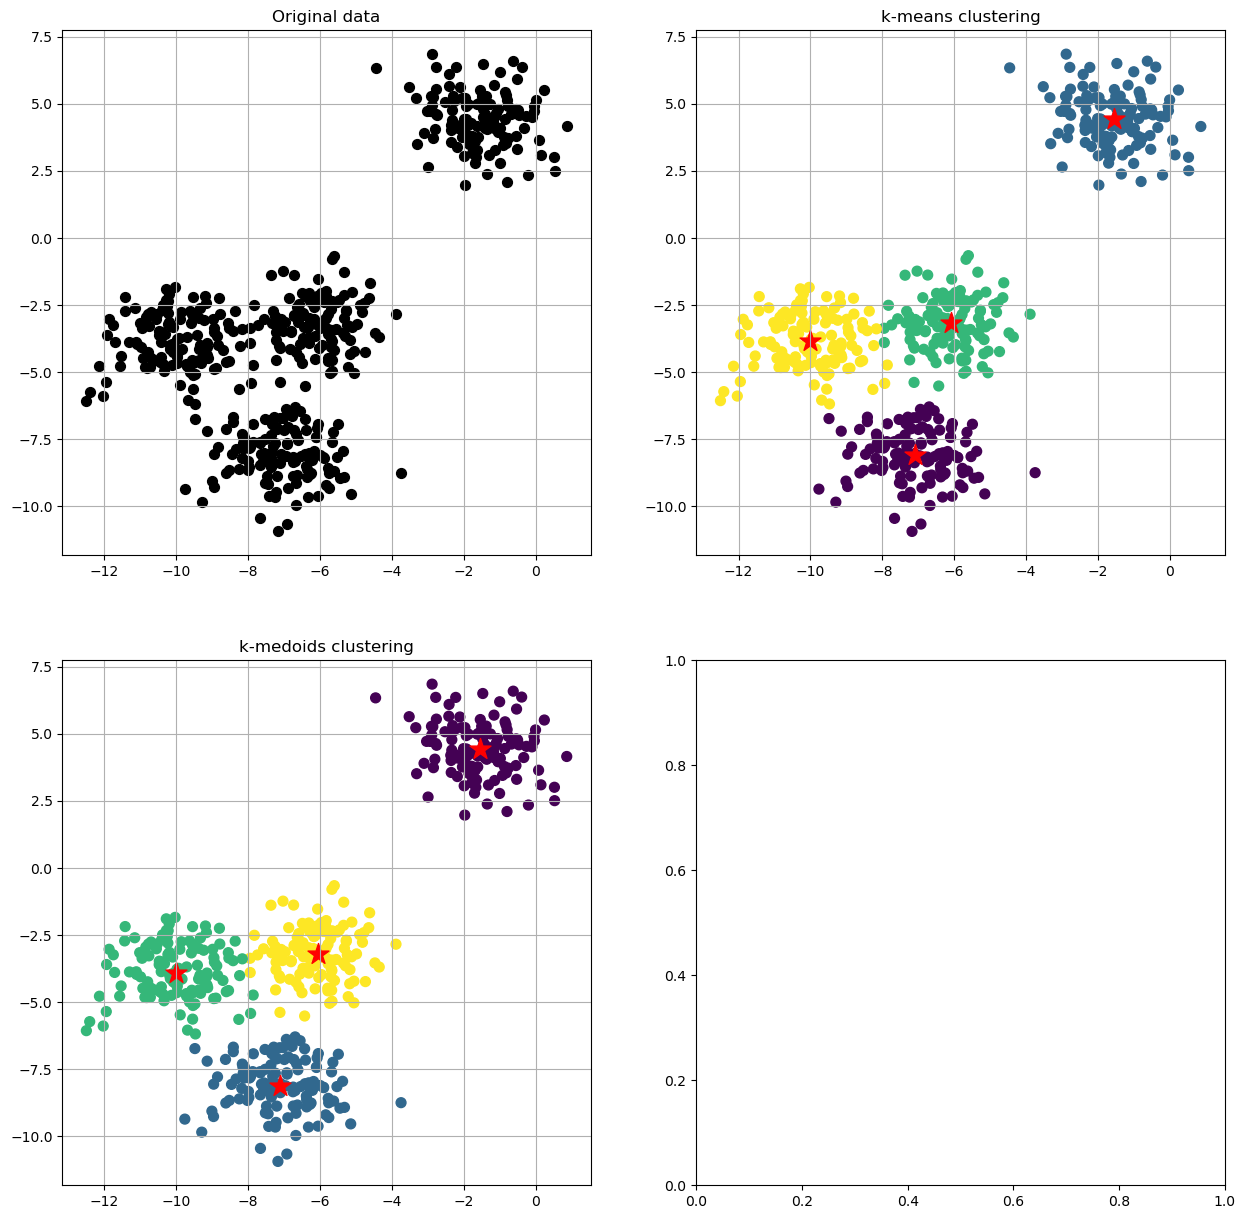

In [15]:
# plot the previous 4 plots in a single figure
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].scatter(X[:, 0], X[:, 1], c='black', marker='o', s=50)
axs[0, 0].grid()
axs[0, 0].set_title('Original data')
axs[0, 1].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
axs[0, 1].scatter(np.array(kmeans.centroids)[:, 0], np.array(kmeans.centroids)[:, 1], s=250, marker='*', c='red', label='centroids')
axs[0, 1].grid()
axs[0, 1].set_title('k-means clustering')
axs[1, 0].scatter(X[:, 0], X[:, 1], c=y_kmedoids, s=50, cmap='viridis')
axs[1, 0].scatter(np.array(kmedoids.centroids)[:, 0], np.array(kmedoids.centroids)[:, 1], s=250, marker='*', c='red', label='centroids')
axs[1, 0].grid()
axs[1, 0].set_title('k-medoids clustering')
plt.show()


For n_clusters = 2, the average silhouette_score is : 0.7049787496083262


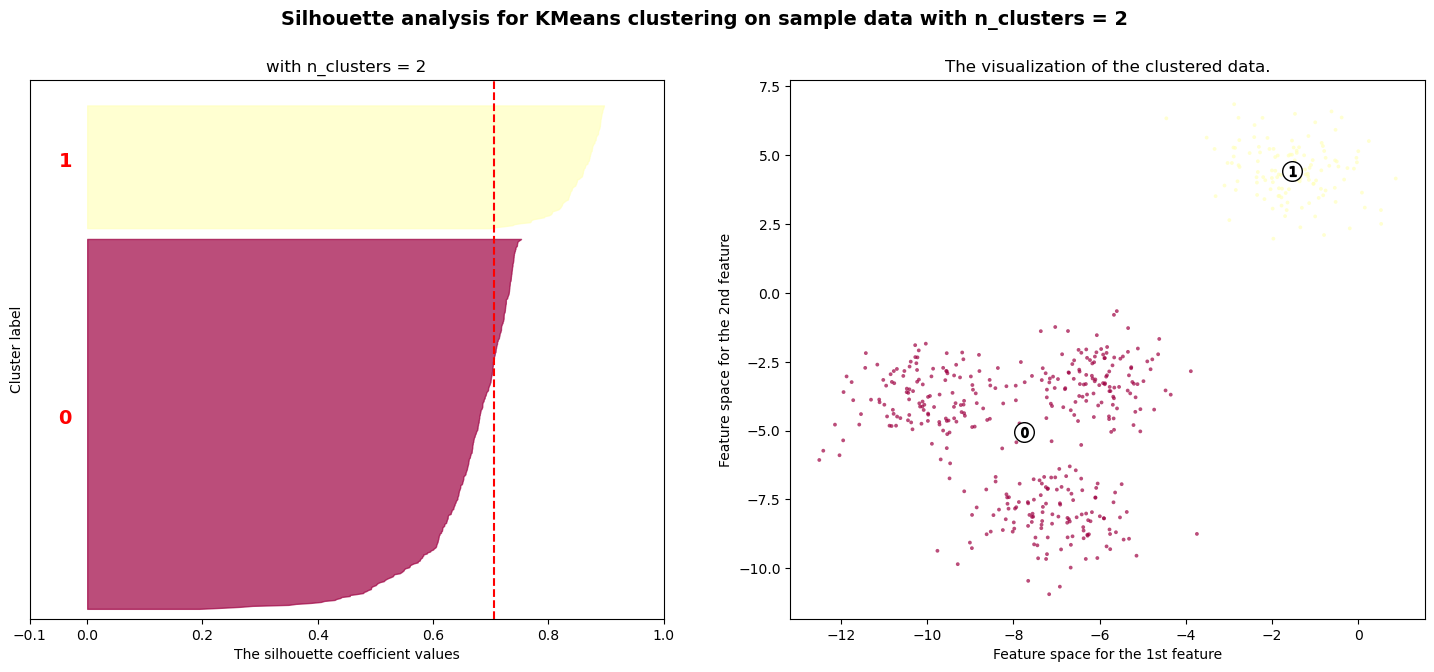

For n_clusters = 3, the average silhouette_score is : 0.5882004012129721


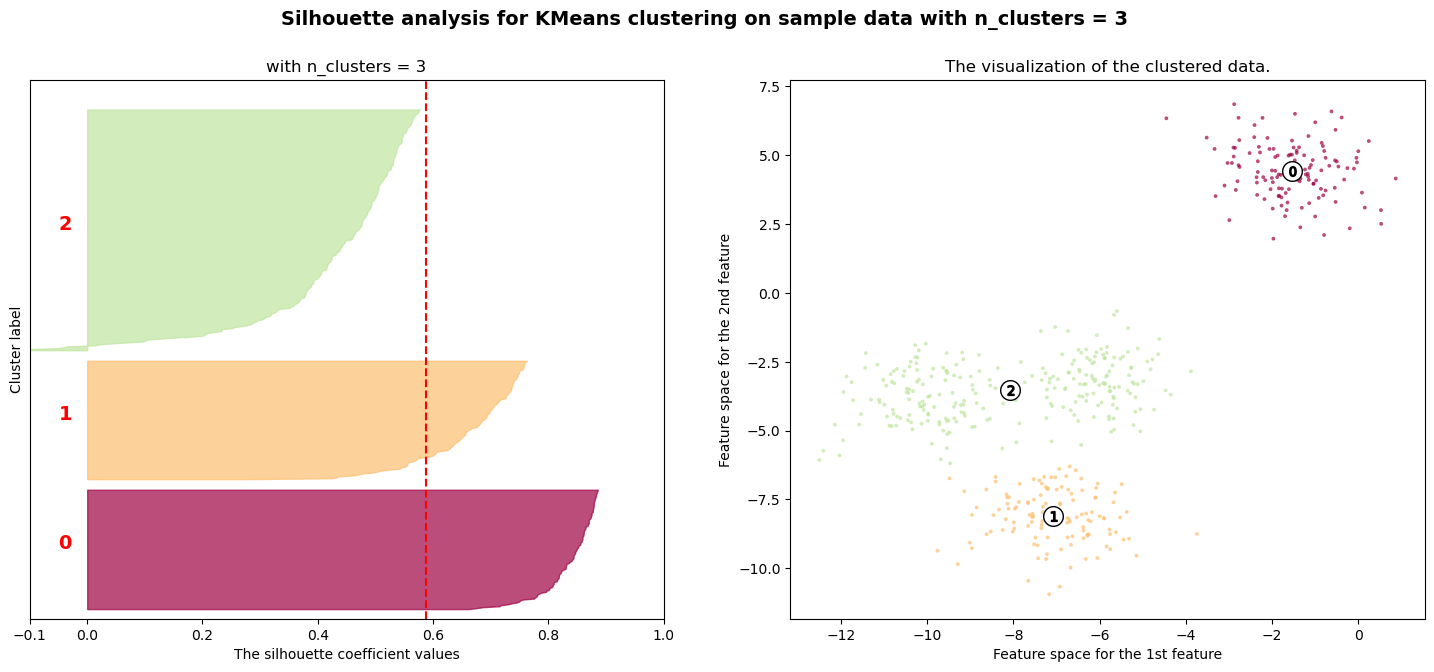

For n_clusters = 4, the average silhouette_score is : 0.6505186632729437


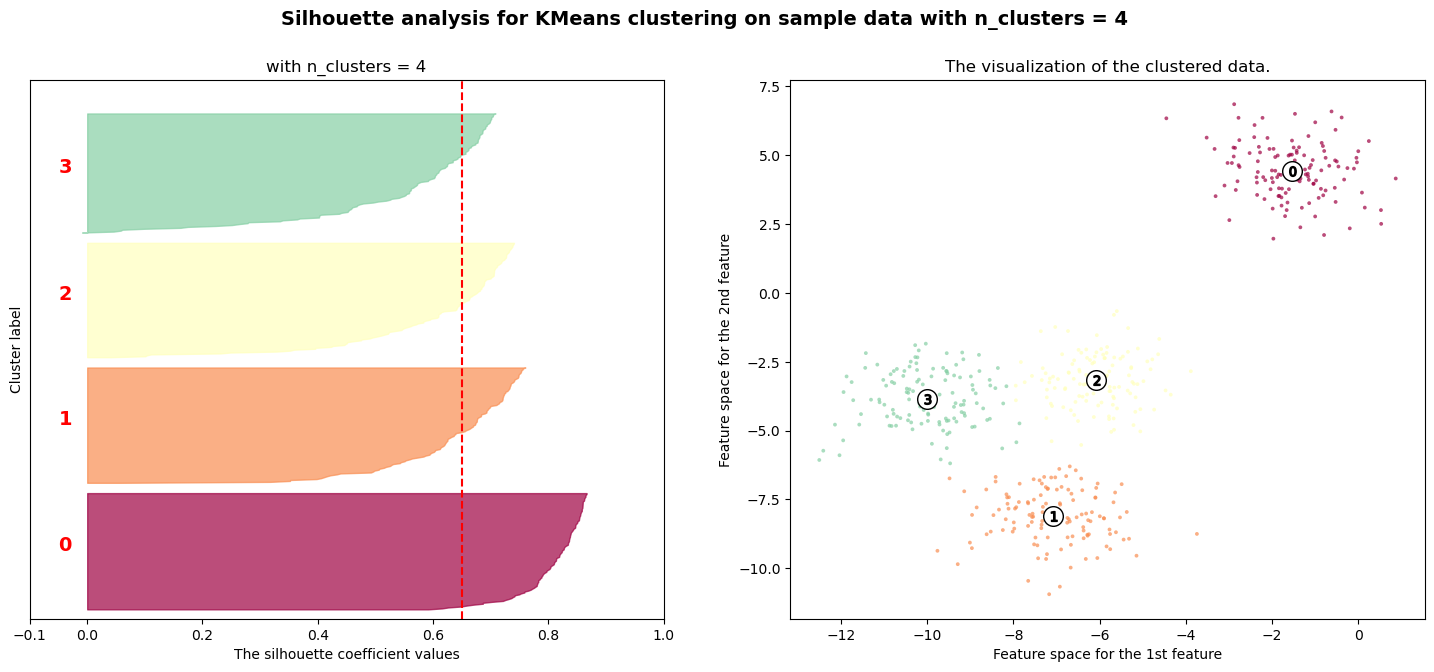

For n_clusters = 5, the average silhouette_score is : 0.5433481058914456


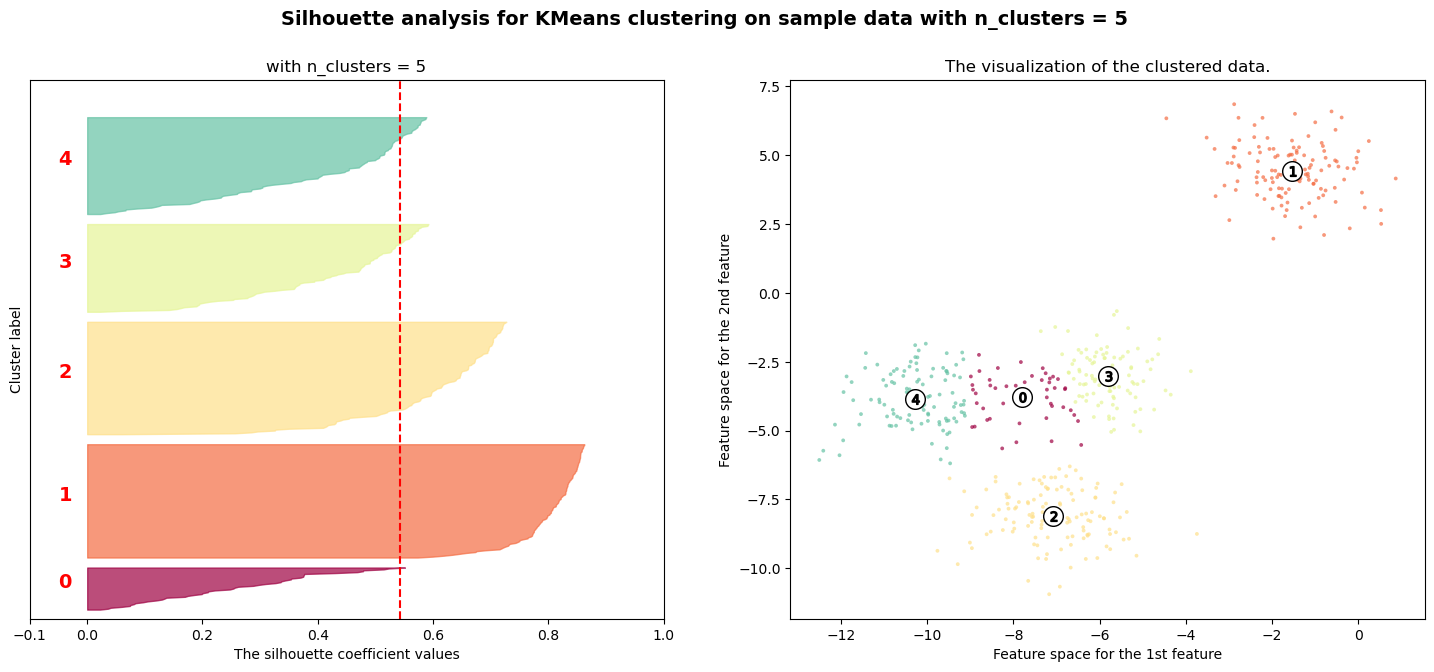

In [16]:
# calculate silhoutte plots with coefficientes for kmeans and kmedoids previously run iterating K from 1 to 5 clusters  
from sklearn.metrics import silhouette_samples, silhouette_score

for K in range(2, 6):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (K + 1) * 15])

    kmeans = KMeans(K=K, max_iters=150, init="random")
    kmeans.fit(X)
    y_km = kmeans.predict()

    silhouette_avg = silhouette_score(X, y_km)
    print(f"For n_clusters = {K}, the average silhouette_score is : {silhouette_avg}")

    sample_silhouette_values = silhouette_samples(X, y_km)

    y_lower = 10
    for i in range(K):
        ith_cluster_silhouette_values = sample_silhouette_values[y_km == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.colormaps.get_cmap("Spectral")(float(i) / K)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
            )

        ax1.text(
            -0.05,
            y_lower + 0.5 * size_cluster_i,
            str(i),
            color="red",
            fontweight="bold",
            fontsize=14,
            )

        y_lower = y_upper + 10
    
    
    ax1.set_title(f"with n_clusters = {K}")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = plt.colormaps.get_cmap("Spectral")(y_km.astype(float) / K)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    centers = np.array(kmeans.centroids)
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker='o',
        c="white",
        alpha=1,
        s=200,
        edgecolor='k',
        )

    for i, c in enumerate(centers):
        ax2.scatter(
            c[0],
            c[1],
            marker='$%d$' % i,
            alpha=1,
            s=50,
            edgecolor='k',
            )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(
        (
            f"Silhouette analysis for KMeans clustering on sample data "
            f"with n_clusters = {K}"
        ),
        fontsize=14,
        fontweight="bold",
        )

    # insert
    plt.show()




For n_clusters = 2, the average silhouette_score is : 0.7049787496083262


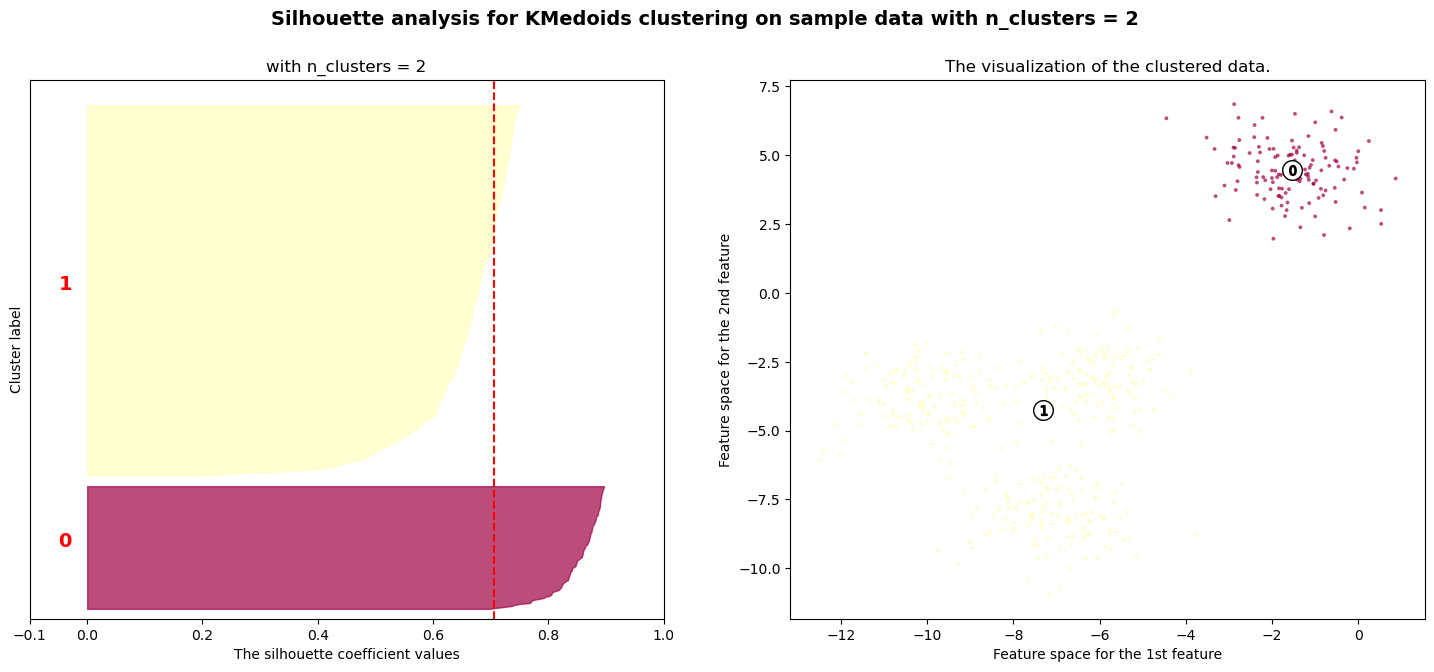

For n_clusters = 3, the average silhouette_score is : 0.5877684124250337


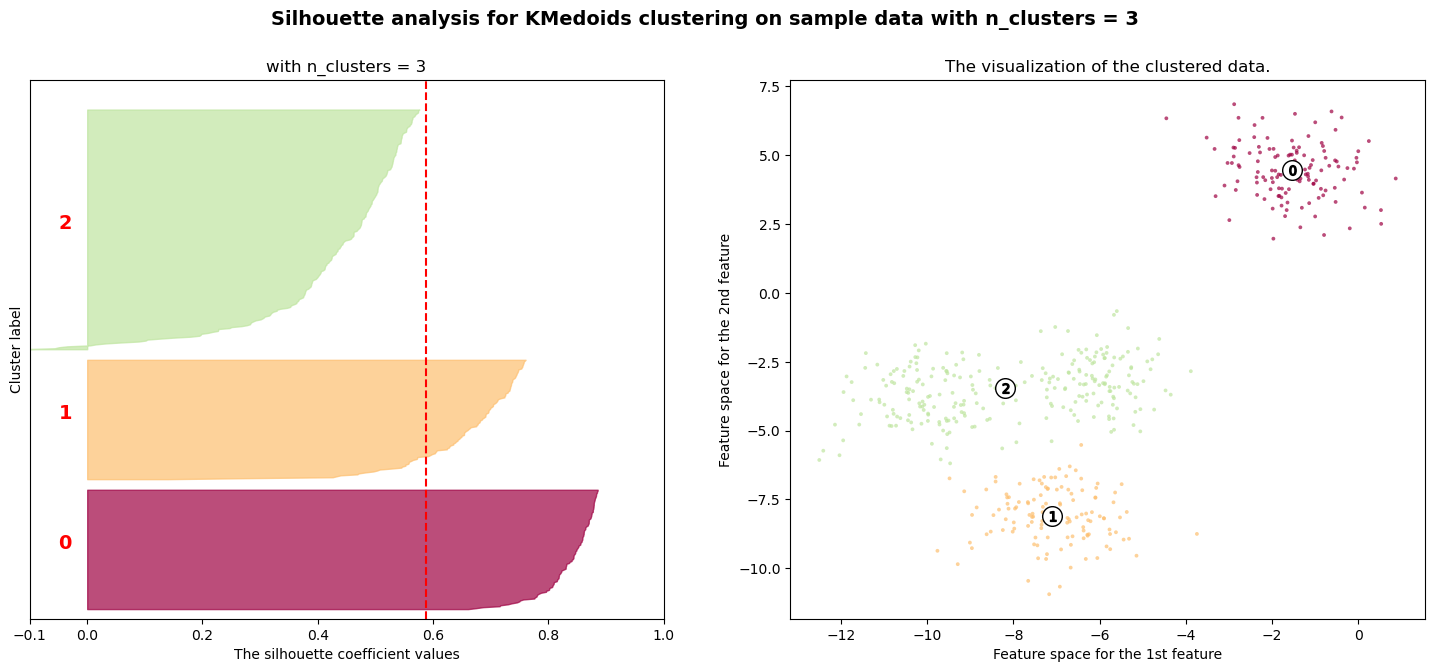

For n_clusters = 4, the average silhouette_score is : 0.6505186632729437


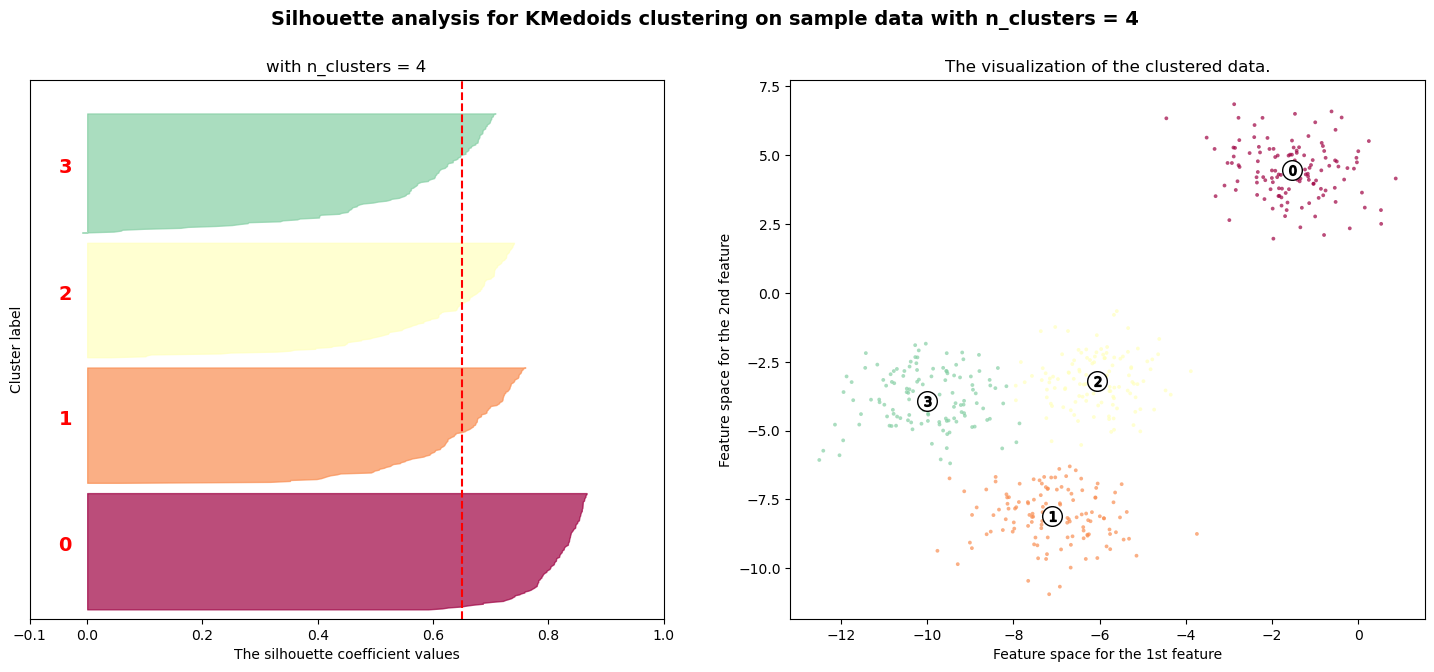

For n_clusters = 5, the average silhouette_score is : 0.5780605766978001


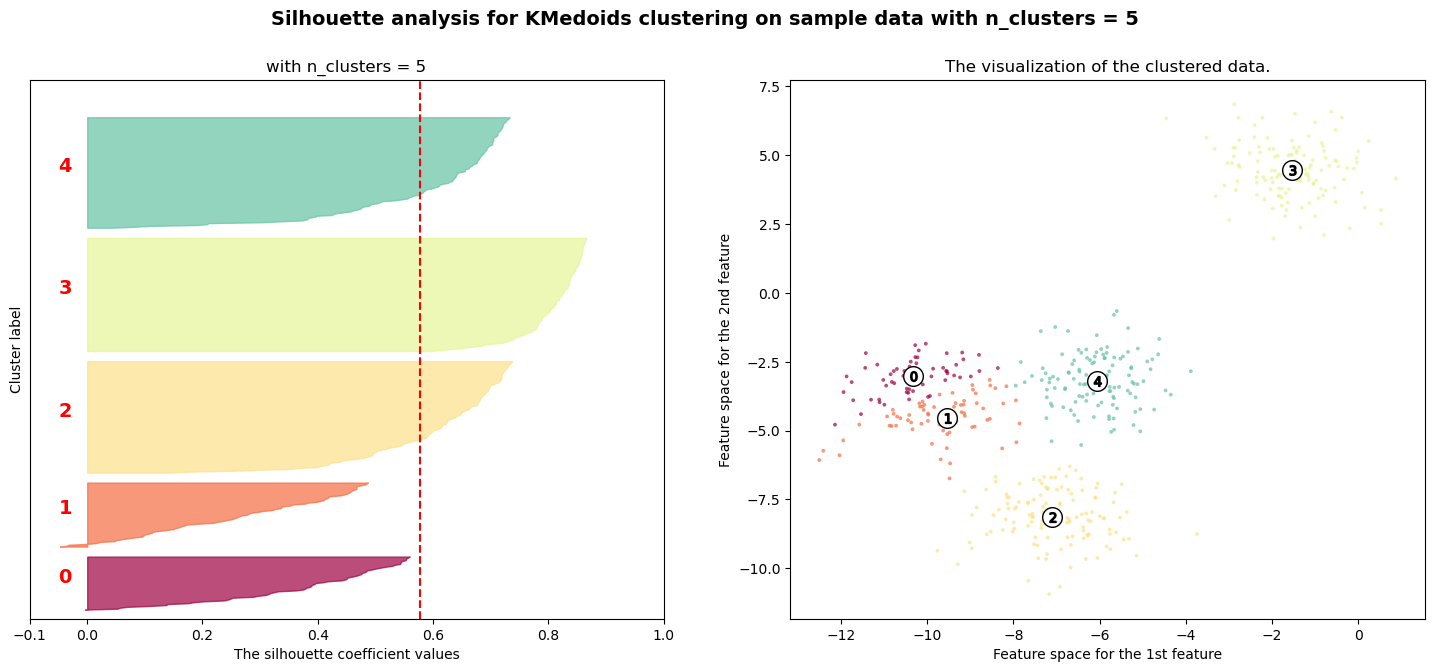

In [17]:
for K in range(2, 6):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (K + 1) * 15])

    kmedoids = KMedoids(K=K, max_iters=150, init="random")
    kmedoids.fit(X)
    y_kmedoids = kmedoids.predict()

    silhouette_avg = silhouette_score(X, y_kmedoids)
    print(f"For n_clusters = {K}, the average silhouette_score is : {silhouette_avg}")

    sample_silhouette_values = silhouette_samples(X, y_kmedoids)

    y_lower = 10
    for i in range(K):
        ith_cluster_silhouette_values = sample_silhouette_values[y_kmedoids == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.colormaps.get_cmap("Spectral")(float(i) / K)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
            )

        ax1.text(
            -0.05,
            y_lower + 0.5 * size_cluster_i,
            str(i),
            color="red",
            fontweight="bold",
            fontsize=14,
            )

        y_lower = y_upper + 10
    
    
    ax1.set_title(f"with n_clusters = {K}")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = plt.colormaps.get_cmap("Spectral")(y_kmedoids.astype(float) / K)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    centers = np.array(kmedoids.centroids)
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker='o',
        c="white",
        alpha=1,
        s=200,
        edgecolor='k',
        )

    for i, c in enumerate(centers):
        ax2.scatter(
            c[0],
            c[1],
            marker='$%d$' % i,
            alpha=1,
            s=50,
            edgecolor='k',
            )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(
        (
            f"Silhouette analysis for KMedoids clustering on sample data "
            f"with n_clusters = {K}"
        ),
        fontsize=14,
        fontweight="bold",
        )

    # insert
    plt.show()


For k = 4, the silhouette coefficient is 0.65. This is a good value in order to determine an optimal number of clusters and its coherent with the clusterization made by kmeans and kmedoids. In general, there are no relevant difference between the silhoutte coefficients for KMeans and KMedoids method. For k = 2 you can see a silhouette cofficient of 0.70. Thats surprising having in mind that in reality and according to KMeans and KMedoids results, the number of clusters is 4. However, this can be explained if we see the separation between clusters 0 and 1, which is large. That could be the reason why the silhouette coefficient for k=2 its so high. Silhouette method measures the separation between clusters and compactation within clusters, to provide a recommended number of groups in the data.

## 6 Use the following code snippet
to create different types of scattered data:

a. Plot the different datasets in separate figures. What can you say about them?

b. Apply k-means, k-medoids, DBSCAN and Spectral Clustering from Scikit-Learn over each dataset and compare the results of each algorithm with respect to each dataset.

In [18]:
from sklearn import cluster, datasets, mixture
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)


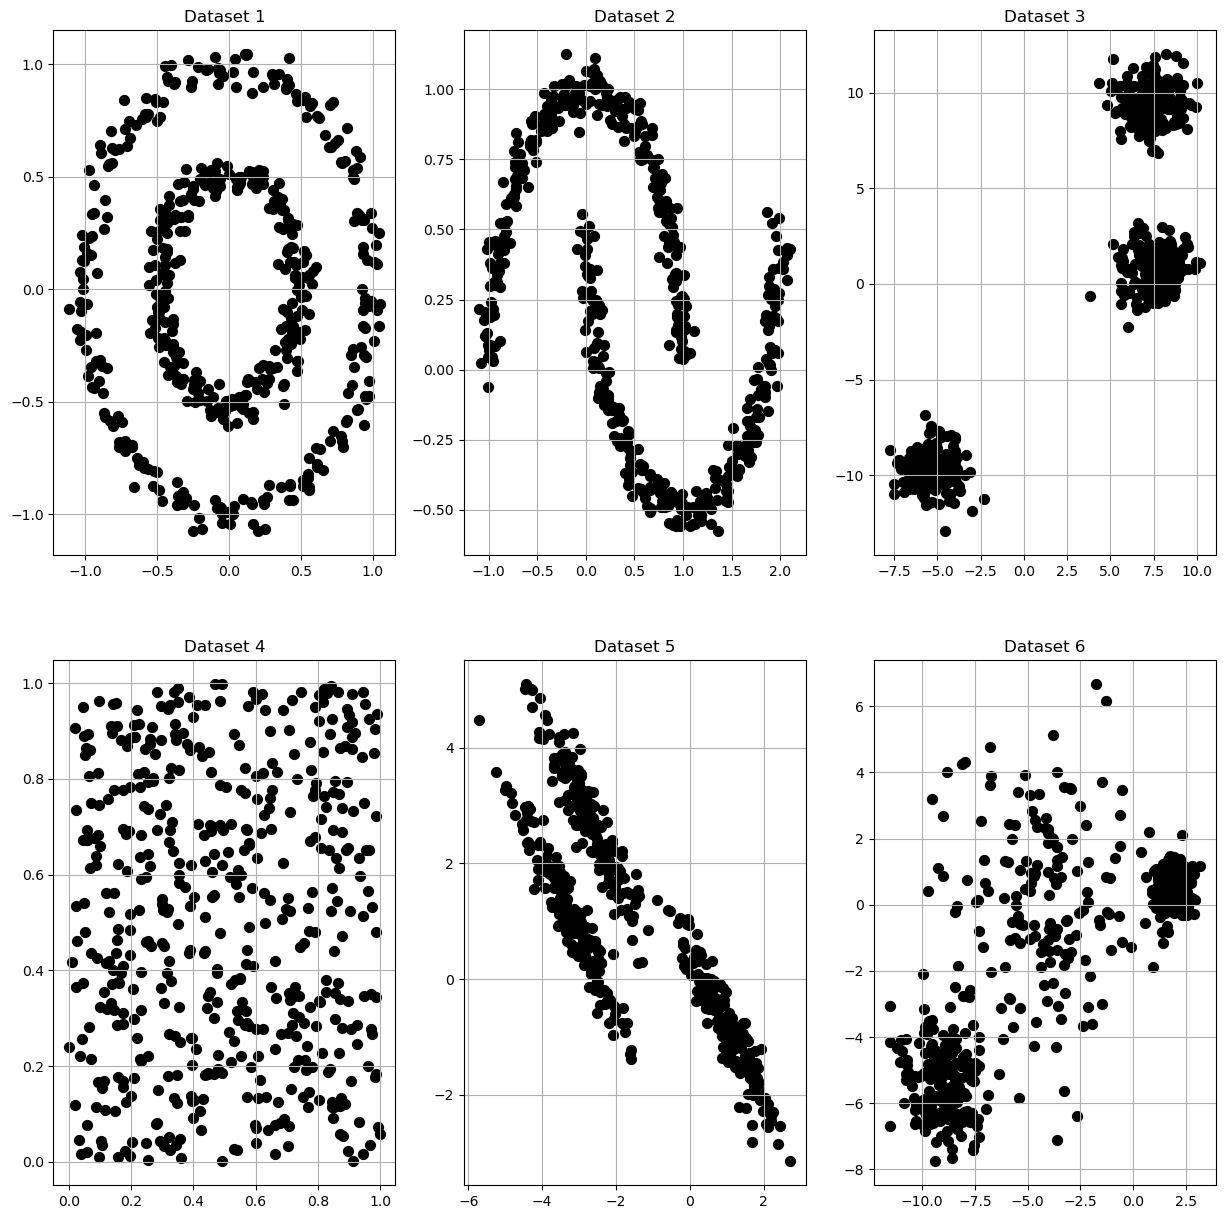

In [19]:
# plot the 6 datasets: noisy_circles, noisy_moons, blobs, no_structure, aniso, varied
datasets = [noisy_circles, noisy_moons, blobs, no_structure, aniso, varied]
fig, axs = plt.subplots(2, 3, figsize=(15, 15))
for i, dataset in enumerate(datasets):
    X, y = dataset
    axs[i//3, i%3].scatter(X[:, 0], X[:, 1], c='black', marker='o', s=50)
    axs[i//3, i%3].grid()
    axs[i//3, i%3].set_title(f'Dataset {i+1}')
plt.show()

- Dataset 1 is formed by an inner circle and an outter circle, intuitively is possible to see that there are 2 groups. 
- Dataset 2 has the shape of 2 curves, and we can see 2 well formed groups too.
- Dataset 3 has 3 clusters with spherical shape.
- Dataset 4 is a completely scattered data with no clusters at first sight.
- Dataset 5 has 3 clusters but the separation between them is minimum.
- Dataset 6 is a mix between groups of points and scattered points. Two cluster can be observed, but possibly there could be more. There is too much noise and outliers in this dataset.

c:\Users\fede_\anaconda3\envs\bd_prueba\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fede_\anaconda3\envs\bd_prueba\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fede_\anaconda3\envs\bd_prueba\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fede_\anaconda3\envs\bd_prueba\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

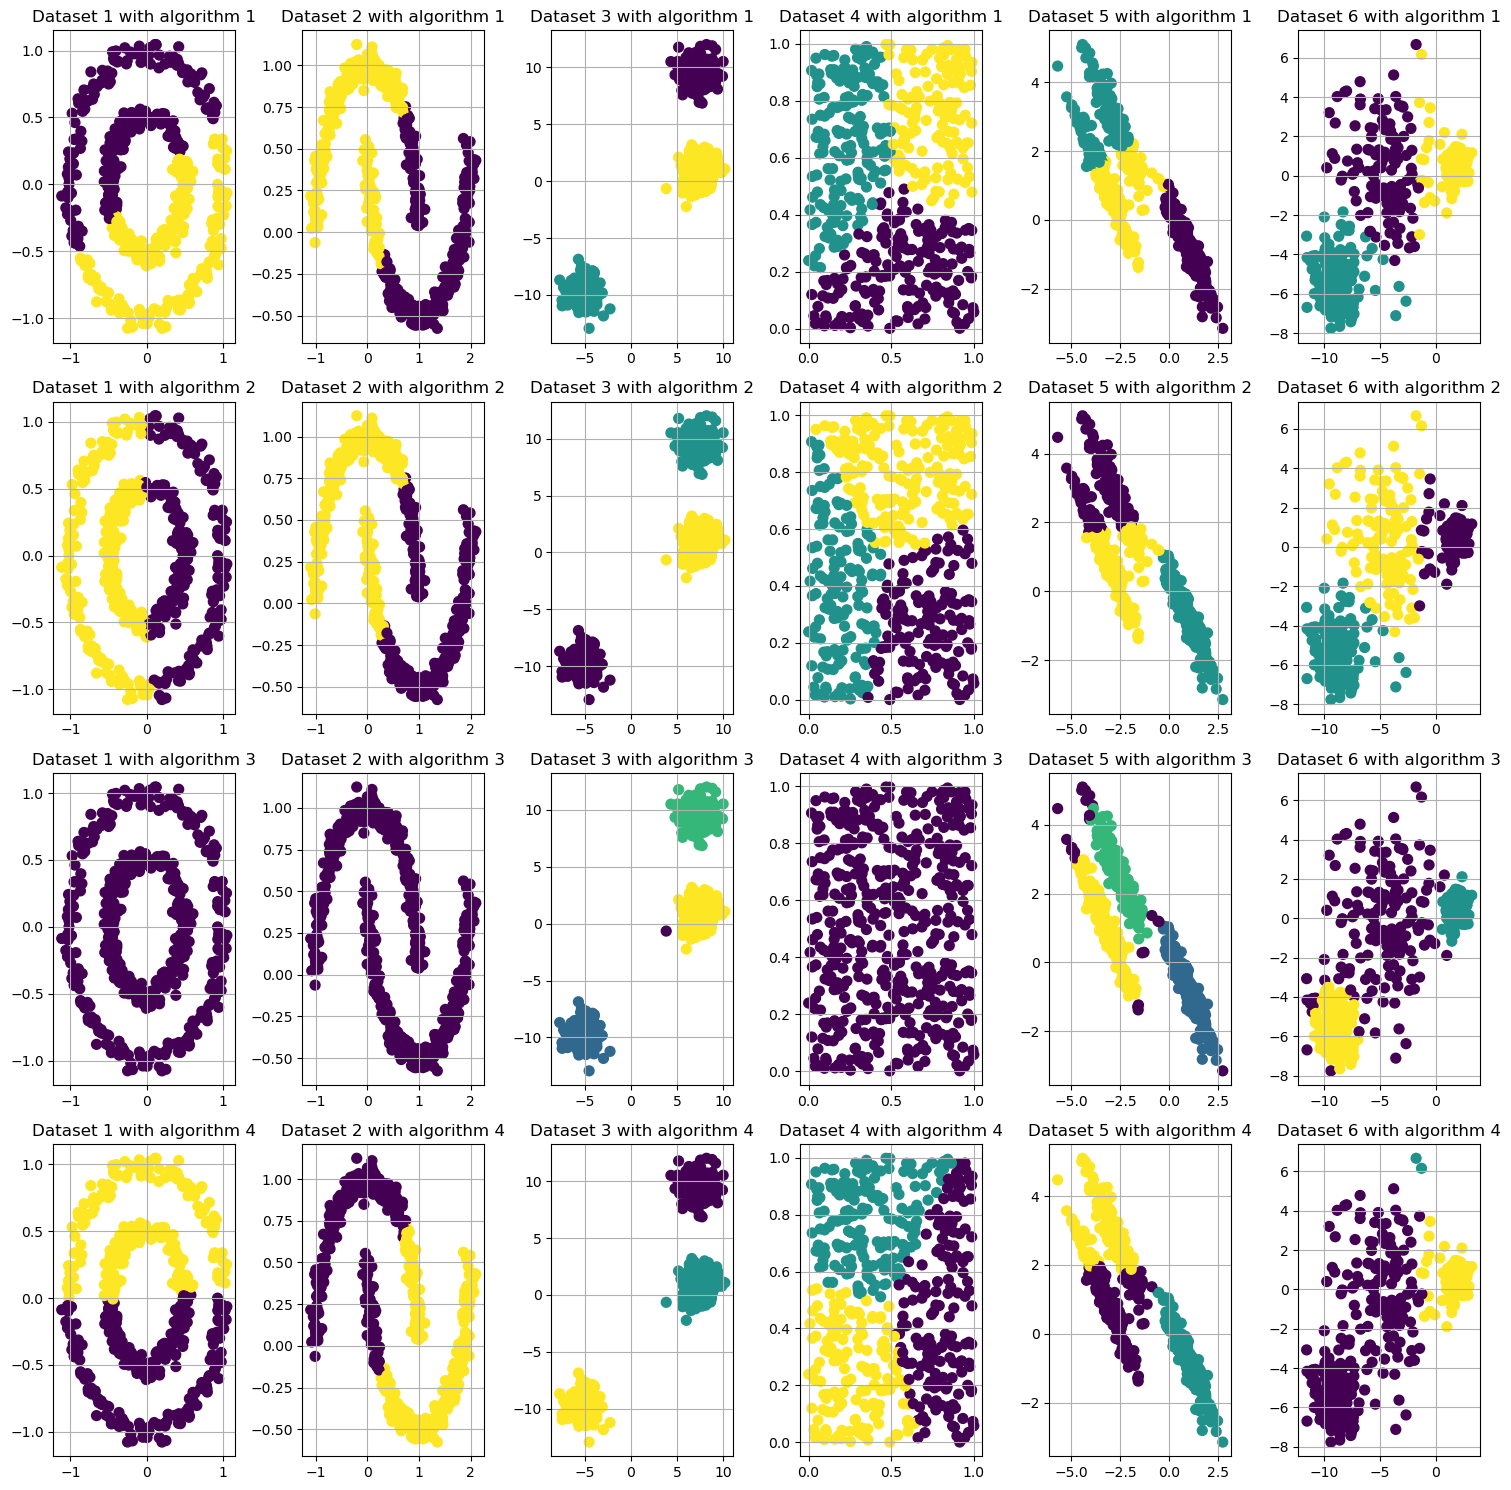

In [20]:
# apply kmeans, kmedoids, dbscan and spectral clustering to the 6 datasets and plot the results
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn_extra.cluster import KMedoids

# define the clustering algorithms
kmeans = KMeans(n_clusters=3, random_state=0)
kmedoids = KMedoids(n_clusters=3, random_state=0)
dbscan = DBSCAN(eps=0.3, min_samples=5)
spectral = SpectralClustering(n_clusters=3, assign_labels="discretize", random_state=0)

# define the clustering algorithms
clustering_algorithms = [kmeans, kmedoids, dbscan, spectral]

def change_hyperparameters(clustering_algorithms, n_clusters, eps=0.3, min_samples=10):
    clustering_algorithms[0].n_clusters = n_clusters
    clustering_algorithms[1].n_clusters = n_clusters
    clustering_algorithms[2].eps = eps
    clustering_algorithms[2].min_samples = min_samples
    clustering_algorithms[3].n_clusters = n_clusters


# plot the 6 datasets: noisy_circles, noisy_moons, blobs, no_structure, aniso, varied
datasets = [noisy_circles, noisy_moons, blobs, no_structure, aniso, varied]
fig, axs = plt.subplots(4, 6, figsize=(15, 15))
for i, dataset in enumerate(datasets):
    X, y = dataset
    
    # call change_hyperparameters and change arguments  according to the dataset
    if i == 0:
        # noisy_circles
        change_hyperparameters(clustering_algorithms, 2, 0.3, 5)
    elif i == 1:
        # noisy_moons
        change_hyperparameters(clustering_algorithms, 2, 0.3, 10)
    elif i == 2:
        # blobs
        change_hyperparameters(clustering_algorithms, 3, 1.7, 10)
    elif i == 3:
        # no_structure
        change_hyperparameters(clustering_algorithms, 3, 0.5, 10)
    elif i == 4:
        # aniso
        change_hyperparameters(clustering_algorithms, 3, 0.5, 15)
    elif i == 5:
        # varied
        change_hyperparameters(clustering_algorithms, 3, 0.8, 15)
 
    for j, algorithm in enumerate(clustering_algorithms):
        y_pred = algorithm.fit_predict(X)
        axs[j, i].scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
        axs[j, i].grid()
        axs[j, i].set_title(f'Dataset {i+1} with algorithm {j+1}')

# insert command to avoid overlapping of subplots
plt.tight_layout()
plt.show()

After tunning the hyperparameters for the different algorithm it can be seen that there are some methods that does not have the ability to separate the data in differents groups. For instance, DBScan can not cluster the Dataset 1, even trying with multiple hyperparameters $eps$ and $min_samples$, the results is always a single group of data. Despite of that, in dataset 2 the clustering is made correctly with DBScan, presenting better results than Spectral Clustering. 

On the other hand, DBScan presents optimal results in the clustering of dataset 5 (aniso), which is very good result taking into account that the 3 clusters are very close to each other. In the scattered data, DBScan doesn't calculate even a single cluster, meanwhile others algorithms creates 3 groups in the data. Altough these results are good, I think that is hard to find the explicability of these groups. 

Dataset 3 is correctly clustered by all the algorithms. A silhouette score could be useful to find the best algorithm of clustering for each dataset.